# Fitting a sine wave 
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/ml_tutorial_csu/tree/main/code/)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/ml_tutorial_csu/blob/main/code/sinewave.ipynb)

In [ ]:
# import packages, set random seed

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# set random seed
random_seed = 36
tf.random.set_seed(int(random_seed))
np.random.seed(int(random_seed))

# nice figures
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi']= 150
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']
mpl.rcParams['font.size'] = 12

## Make data
First we make the data to fit, Nsamples between -1 and 1 for input, and sin(x) as output

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


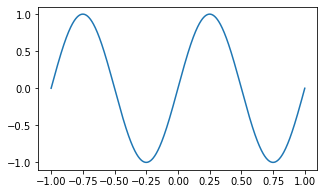

In [ ]:
Nsamples = 1000

xdata = np.linspace(-1,1,Nsamples)
ydata = np.sin(2*np.pi*xdata)

plt.figure(figsize=(5,3))
plt.plot(xdata,ydata)
plt.show()

## Now make some training and validation pairs
One way we can split into training, validation and testing is we grab a random 50% of data from the above sine wave for our training data. Then we further grab 25% from the remaining chunk for the validation data. This way, validation data is representative of the function, but does not repeat the training data. The last chunk of the data is used for testing. For this method set randomselect=1

Another way to do this is by dividing the data into evenly spaced chunks. This way, there is less auto-correlation between the samples in the training, validation and testing. For this method, set randomselect=0

In [ ]:
Nfull = xdata.shape[0]

# grab 50% of data for training, then 25% of remaining data for validation, and last chunk for testing
Ntrain = int(Nfull*0.5)
Nval = int(Nfull*0.25)
Ntest = int(Nfull*0.25)

In [ ]:
randomselect = 1

if randomselect == 1:
    allind = np.random.choice(np.arange(Nfull),size=Nfull,replace=False) 
    trainind = allind[:Ntrain]
    valind = allind[Ntrain:Ntrain+Nval]
    testind = allind[Ntrain+Nval:]

else:
    division = 200
    trainind = []
    valind = []
    testind = []
    for i in range(int(Nsamples/division)):
        print(i)
        trainind = trainind + list(range(division*i, int(division*i+division/4))) + list(range(int(division*i+division*3/4), division*(i+1)))
        valind = valind + list(range(int(division*i+division/4), int(division*i+division/2)))
        testind = testind + list(range(int(division*i+division/2), int(division*i+division*3/4)))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


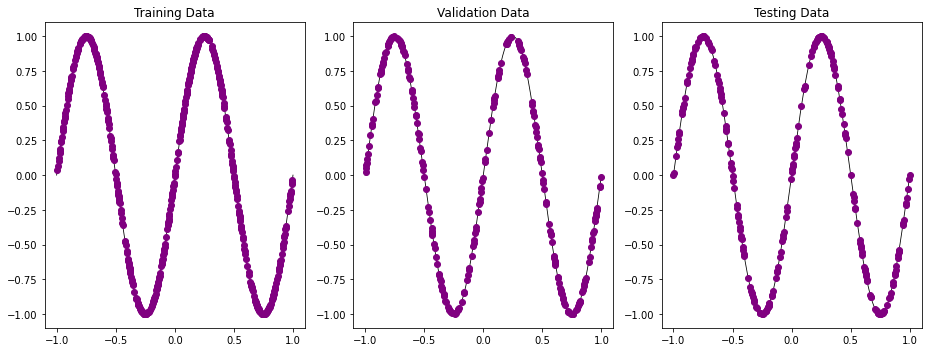

In [ ]:
xtrain = xdata[trainind]
ytrain = ydata[trainind]
xval = xdata[valind]
yval = ydata[valind]
xtest = xdata[testind]
ytest = ydata[testind]

plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.plot(xdata,ydata,color='black',linewidth=0.8)
plt.plot(xtrain,ytrain,color='purple',marker='o',linestyle='None')
#plt.text(-0.6,0.8,'Training Data',fontsize=14)
plt.title('Training Data')

plt.subplot(1,3,2)
plt.plot(xdata,ydata,color='black',linewidth=0.8)
plt.plot(xval,yval,color='purple',marker='o',linestyle='None')
#plt.text(-0.6,0.8,'Validation Data',fontsize=14)
plt.title('Validation Data')

plt.subplot(1,3,3)
plt.plot(xdata,ydata,color='black',linewidth=0.8)
plt.plot(xtest,ytest,color='purple',marker='o',linestyle='None')
#plt.text(-0.6,0.8,'Testing Data',fontsize=14)
plt.title('Testing Data')

plt.tight_layout()
plt.show()

## Set some neural network parameters
Here we define parts of the neural network architecture and hyper-parameters

In [ ]:
lr =   #learning rate
batch_size = 
n_epochs =  #number of training epochs
activation =  #activation function on hidden layers
hiddens =  #hidden layers e.g. [5,8] is two hiddens layers the first with 5 nodes and the second with 8 nodes
loss =  #loss function

## Make and train the model

In [ ]:
nhiddens = len(hiddens)

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(hiddens[0], activation=activation, input_shape=(1,),
                bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                ))

# and the rest of the layers
for ilayer in range(1,nhiddens):
    model.add(tf.keras.layers.Dense(hiddens[ilayer], activation=activation,
                    bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                    kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                    )) 

# final layer
model.add(tf.keras.layers.Dense(1,activation='linear',
                bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),))


model.compile(optimizer=tf.keras.optimizers.Adam(lr),  # optimizer
            loss=loss,   # loss function   
            metrics=['mae','mse']) 

history = model.fit(xtrain, ytrain, epochs=n_epochs, batch_size=batch_size, validation_data=(xval, yval), 
                shuffle=True, verbose=0)

## How well did it do?

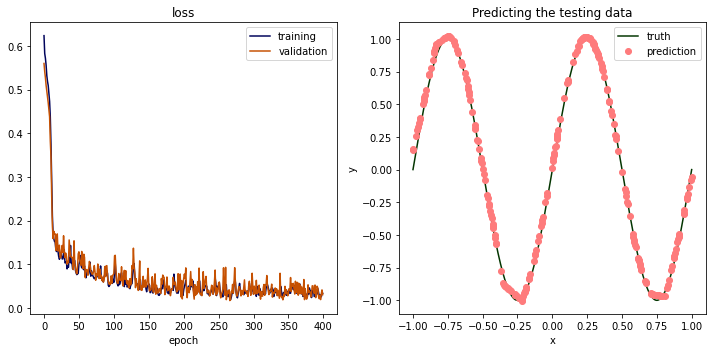

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('loss')
plt.plot(history.history['loss'],label='training',color='xkcd:dark blue')
plt.plot(history.history['val_loss'],label='validation',color='xkcd:dark orange')
plt.xlabel('epoch')
plt.legend()

ypred = model.predict(xtest)

plt.subplot(1,2,2)
plt.plot(xdata,ydata,label='truth',color='xkcd:dark green')
plt.plot(xtest,ypred,marker='o',linestyle='none',label='prediction',color='xkcd:salmon pink')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicting the testing data')
plt.legend()

plt.tight_layout()
plt.show()